In [2]:
library(vcd)
library(vcdExtra)
library(MASS)

In [3]:
## UCBAdmissions data:
## Aggregate data on applicants to graduate school at Berkeley 
## for the six largest departments in 1973 classified by admission and sex.
library(vcd)
data("UCBAdmissions")
str(UCBAdmissions)

 'table' num [1:2, 1:2, 1:6] 512 313 89 19 353 207 17 8 120 205 ...
 - attr(*, "dimnames")=List of 3
  ..$ Admit : chr [1:2] "Admitted" "Rejected"
  ..$ Gender: chr [1:2] "Male" "Female"
  ..$ Dept  : chr [1:6] "A" "B" "C" "D" ...


In [4]:
## Place Gender in X dimension:
UCBAdmissions <- aperm(UCBAdmissions, c(2,1,3))
str(UCBAdmissions)

 'table' num [1:2, 1:2, 1:6] 512 89 313 19 353 17 207 8 120 202 ...
 - attr(*, "dimnames")=List of 3
  ..$ Gender: chr [1:2] "Male" "Female"
  ..$ Admit : chr [1:2] "Admitted" "Rejected"
  ..$ Dept  : chr [1:6] "A" "B" "C" "D" ...


In [5]:
## View the table:
# UCBAdmissions

In [6]:
## For a better view, flatten the contingency tables.
UCB.ft <- ftable(UCBAdmissions)
UCB.ft
addmargins(UCB.ft)

                Dept   A   B   C   D   E   F
Gender Admit                                
Male   Admitted      512 353 120 138  53  22
       Rejected      313 207 205 279 138 351
Female Admitted       89  17 202 131  94  24
       Rejected       19   8 391 244 299 317

Sum 
    512 353 120 138  53  22 1198
    313 207 205 279 138 351 1493
     89  17 202 131  94  24  557
     19   8 391 244 299 317 1278
Sum 933 585 918 792 584 714 4526

In [7]:
## Consider the margin table of Gender and Admit:
UCB.GA <- margin.table(UCBAdmissions, 
                       margin=c(1,2))
addmargins(UCB.GA)

## The margin table in proportion of each gender:
UCB.GA.mg1 <- prop.table(UCB.GA, margin=1)
round(addmargins( UCB.GA.mg1 ), 2)

Admit
Gender   Admitted Rejected Sum 
  Male   1198     1493     2691
  Female  557     1278     1835
  Sum    1755     2771     4526

Admit
Gender   Admitted Rejected Sum
  Male   0.45     0.55     1  
  Female 0.30     0.70     1  
  Sum    0.75     1.25     2

In [8]:
## bar chart of the propotional margin table:
par(cex=1.5)
barplot(t(UCB.GA.mg1), horiz=TRUE, legend=colnames(UCB.GA.mg1))

In [9]:
## Chi-squared test of independence:
chisq.test(UCB.GA)


	Pearson's Chi-squared test with Yates' continuity correction

data:  UCB.GA
X-squared = 91.61, df = 1, p-value < 2.2e-16


In [10]:
## Association Statistics:
assocstats(UCB.GA)

                    X^2 df P(> X^2)
Likelihood Ratio 93.449  1        0
Pearson          92.205  1        0

Phi-Coefficient   : 0.143 
Contingency Coeff.: 0.141 
Cramer's V        : 0.143 

In [11]:
## Odds ratio and confidence interval by library(vcd):
oddsratio(UCB.GA, log=FALSE)           ## odds ratio
confint(oddsratio(UCB.GA, log=FALSE))  ## confidence interval

 odds ratios for Gender and Admit 

[1] 1.84108

2.5 %    97.5 %  
Male:Female/Admitted:Rejected 1.624377 2.086693

In [12]:
## Odds ratio by hand:
OR.UCB.GA <- UCB.GA[1,1]*UCB.GA[2,2]/(UCB.GA[1,2]*UCB.GA[2,1])
OR.UCB.GA

[1] 1.84108

In [13]:
## Confidence interval of odds ratio by hand:
OR.lw <- log(OR.UCB.GA) - sqrt(sum(1/UCB.GA)) * qnorm(0.975)
OR.up <- log(OR.UCB.GA) + sqrt(sum(1/UCB.GA)) * qnorm(0.975)
exp(OR.lw)
exp(OR.up)

[1] 1.624377

[1] 2.086693

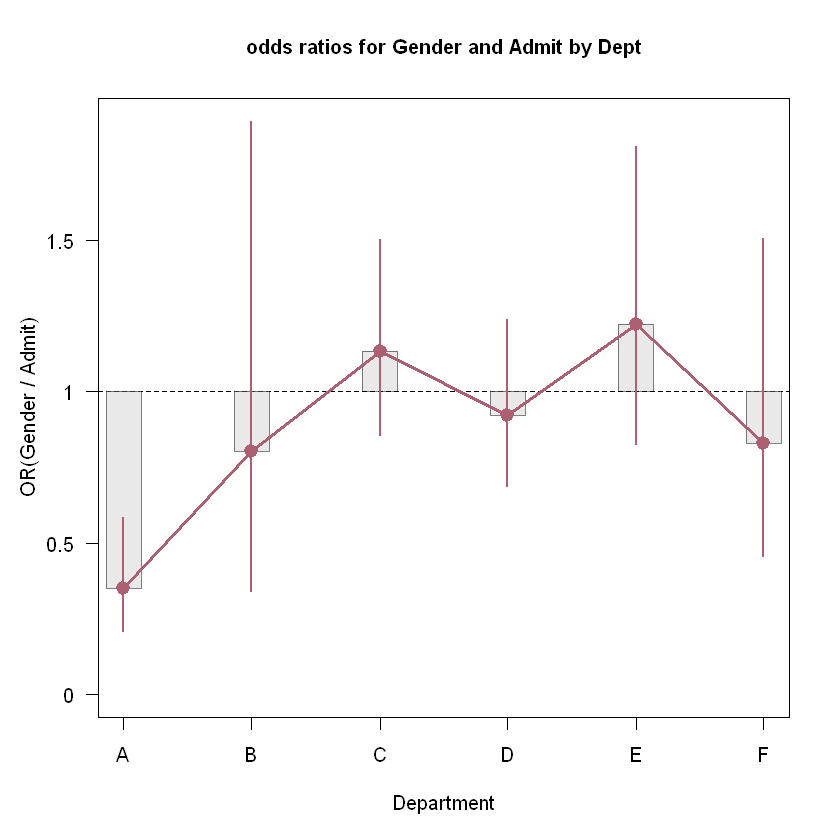

In [15]:
## odds ratio for each department with confidence interval:
plot(oddsratio(UCBAdmissions, log=FALSE), 
     xlab="Department")

In [16]:
## A matrix of (marginal) mosaic plots for the 3-way contingency tables:
pairs(UCBAdmissions, gp=shading_max)

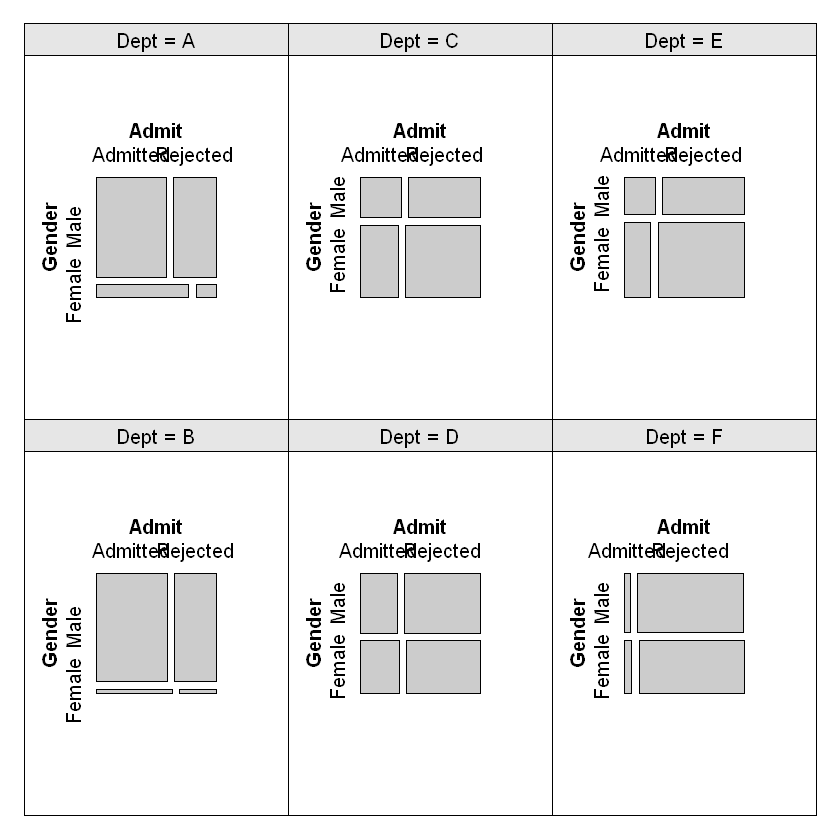

In [17]:
## Conditional plots for the 3-way contingency tables:
cotabplot(UCBAdmissions, cond="Dept")

In [18]:
## Doubledecker plot.
## Formally, they are mosaic plots with vertical splits: 
doubledecker(Admit ~ Dept + Gender, 
             data = UCBAdmissions, 
             gp=gpar(fill=c("aquamarine", "gray")))

In [19]:
## Log-linear model approach:

## Complete Independence:
## [A][D][G]
UCB.loglm0 <- loglm(~ Dept + Gender + Admit, data = UCBAdmissions, 
                    param = TRUE, fitted = TRUE)
UCB.loglm0

Call:
loglm(formula = ~Dept + Gender + Admit, data = UCBAdmissions, 
    param = TRUE, fitted = TRUE)

Statistics:
                      X^2 df P(> X^2)
Likelihood Ratio 2097.671 16        0
Pearson          2000.328 16        0

In [20]:
## Joint Independence:
## [A][DG]
UCB.loglm1 <- loglm(~ Dept * Gender + Admit, data = UCBAdmissions,
                     param = TRUE, fitted = TRUE)

## [AG][D]
UCB.loglm2 <- loglm(~ Dept + Admit * Gender, data = UCBAdmissions,
                     param = TRUE, fitted = TRUE)

## [AD][G]
UCB.loglm3 <- loglm(~ Dept * Admit + Gender, data = UCBAdmissions,
                     param = TRUE, fitted = TRUE)

In [21]:
## Conditional Independence:
## [AD][AG]
UCB.loglm4 <- loglm(~ Admit*(Dept + Gender), data = UCBAdmissions,
                     param = TRUE, fitted = TRUE)

## [DA][DG]
UCB.loglm5 <- loglm(~ Dept*(Admit + Gender), data = UCBAdmissions,
                     param = TRUE, fitted = TRUE)

## [GA][GD]
UCB.loglm6 <- loglm(~ Gender*(Admit + Dept), data = UCBAdmissions,
                     param = TRUE, fitted = TRUE)

In [22]:
## Homogeneous Association:
## [GA][GD][AD]
UCB.loglm7 <- loglm(~ (Gender + Admit + Dept)^2, data = UCBAdmissions,
                     param = TRUE, fitted = TRUE)

In [23]:
## Brief Summary of model fit by LRstats() from library(vcdExtra):
LRstats(UCB.loglm0, 
        UCB.loglm1, UCB.loglm2, UCB.loglm3, 
        UCB.loglm4, UCB.loglm5, UCB.loglm6, 
        UCB.loglm7)

AIC       BIC       LR Chisq   Df Pr(>Chisq)   
UCB.loglm0 2272.7309 2282.1553 2097.67121 16  0.000000e+00
UCB.loglm1 1062.1161 1077.4308  877.05641 11 5.299332e-181
UCB.loglm2 2181.2815 2191.8840 2004.22181 15  0.000000e+00
UCB.loglm3 1427.4100 1442.7247 1242.35031 11 1.204531e-259
UCB.loglm4 1335.9606 1352.4533 1148.90090 10 1.510665e-240
UCB.loglm5  216.7952  238.0002   21.73551  6  1.351993e-03
UCB.loglm6  970.6667  987.1595  783.60701 10 6.892992e-162
UCB.loglm7  217.2640  239.6470   20.20428  5  1.144076e-03

In [24]:
## Use anova() for model comparison:
## (the name anova mostly comes from linear regression,
## for GLM, it is more like "analysis of deviance".)

## The hypothesis testing is only meaningful when the models are nested,
## that is, the 1st model is the special case of the 2nd, etc.

## Here we want to compare UCB.loglm5 and UCB.loglm7:
anova(UCB.loglm5, UCB.loglm7, test="LR")  ## OR test="Chisq"

## Results interpretation :
## 1st test: H0: UCB.loglm5, H1: UCB.loglm7 -> p-val = 0.2159
## 2nd test: H0: UCB.loglm7, H1: saturated  -> p-val = 0.0011

LR tests for hierarchical log-linear models

Model 1:
 ~Dept * (Admit + Gender) 
Model 2:
 ~(Gender + Admit + Dept)^2 

          Deviance df Delta(Dev) Delta(df) P(> Delta(Dev)
Model 1   21.73551  6                                    
Model 2   20.20428  5   1.531226         1        0.21593
Saturated  0.00000  0  20.204281         5        0.00114

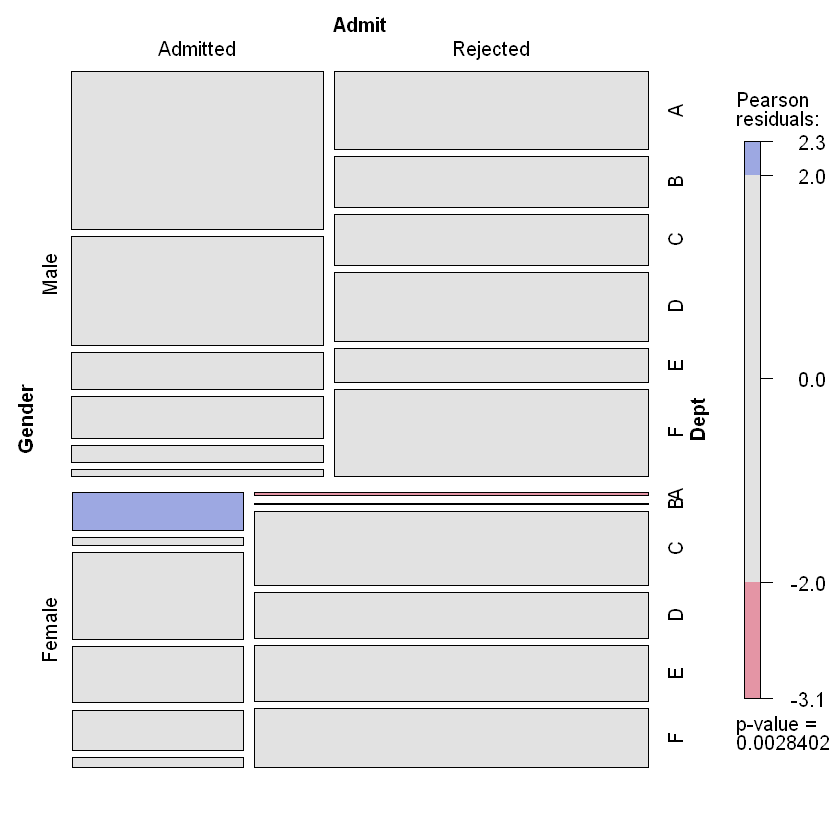

In [25]:
## Visually compare Pearson residuals 
mosaic(UCB.loglm5)  ## [DA][DG], or A⊥G | D  ## Female on Dept A is not well fitted

In [26]:
## To extract residuals:
# residuals(UCB.loglm5, type="pearson")

In [27]:
## To extract parameters:
# UCB.loglm5$param

In [28]:
## Compare odds of fitted to odds of observed:

## model 5: log(odds(Being admitted)):
odds.fitted.loglm5 <- log( UCB.loglm5$fitted[,1,] / UCB.loglm5$fitted[,2,] )
odds.fitted.loglm5

## observed: log(odds(Being admitted)):
odds.obs <- log(UCBAdmissions[,1,] / UCBAdmissions[,2,])
odds.obs

        Dept
Gender            A          B          C          D          E          F
  Male    0.5934600  0.5428650 -0.6156891 -0.6648701 -1.0895006 -2.6756468
  Female  0.5934600  0.5428650 -0.6156891 -0.6648701 -1.0895006 -2.6756468

        Dept
Gender            A          B          C          D          E          F
  Male    0.4921214  0.5337493 -0.5355182 -0.7039581 -0.9569618 -2.7697438
  Female  1.5441974  0.7537718 -0.6604399 -0.6219709 -1.1571488 -2.5808479